In [1]:
# 简单的网格搜索实现
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 加载数据集
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在测试集上评估SVC
        score = svm.score(X_test, y_test)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


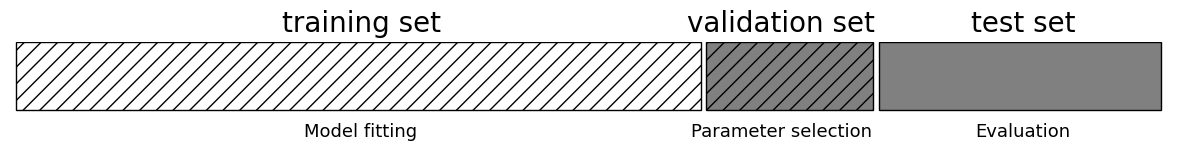

In [2]:
import mglearn
import matplotlib.pyplot as plt 

mglearn.plots.plot_threefold_split()

# plt.tight_layout()
plt.savefig('Images/02GridSearch-01.png', bbox_inches='tight')
plt.show()

In [3]:
from sklearn.svm import SVC
# 将数据划分为训练+验证集与测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 将训练+验证集划分为训练集与验证集
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在验证集上评估SVC
        score = svm.score(X_valid, y_valid)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
           best_score = score
           best_parameters = {'C': C, 'gamma': gamma}
# 在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [4]:
from sklearn.model_selection import cross_val_score
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对于每种参数组合都训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        # 执行交叉验证
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 计算交叉验证平均精度
        score = np.mean(scores)
        # 如果我们得到了更高的分数，则保存该分数和对应的参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 在训练+验证集上重新构建一个模型
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

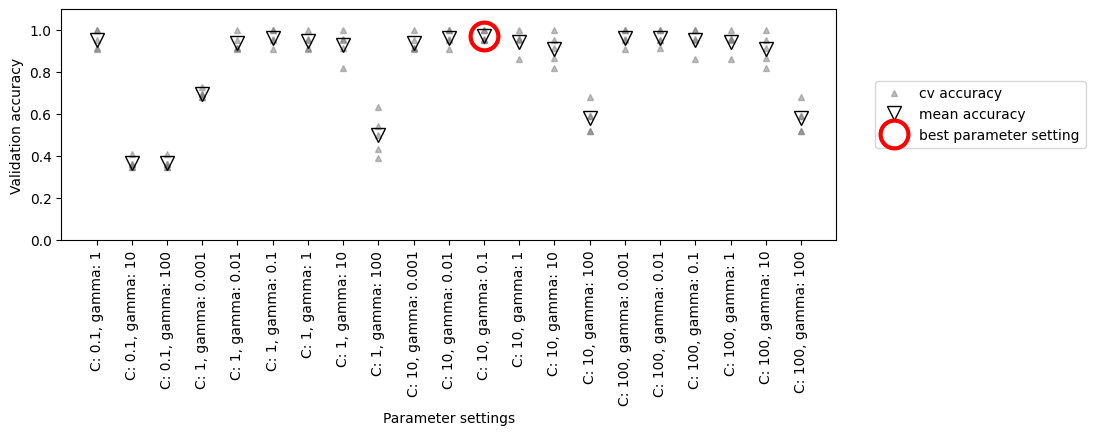

In [5]:
mglearn.plots.plot_cross_val_selection()

# plt.tight_layout()
plt.savefig('Images/02GridSearch-02.png', bbox_inches='tight')
plt.show()

C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_226316\128259952.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


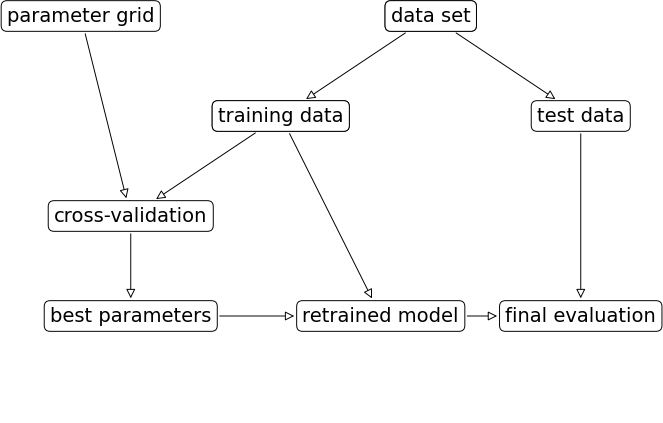

In [6]:
mglearn.plots.plot_grid_search_overview()

plt.tight_layout()
plt.savefig('Images/02GridSearch-03.png', bbox_inches='tight')
plt.show()

In [7]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [11]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [12]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [13]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [14]:
import pandas as pd
# 转换为DataFrame（数据框）
results = pd.DataFrame(grid_search.cv_results_)
# 显示前5行
display(results.head())


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000798,0.000400,0.000199,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000399,0.000489,0.000398,0.000488,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000199,0.000399,0.000598,0.000490,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000399,0.000488,0.000399,0.000488,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000221,0.000441,0.000399,0.000489,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


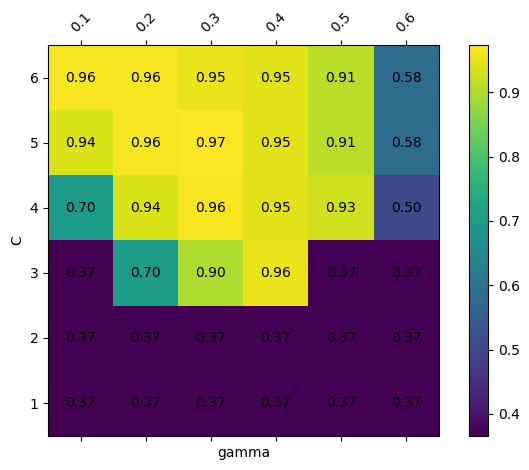

In [34]:

scores = np.array(results.mean_test_score).reshape(6, 6)

# 对交叉验证平均分数作图
# （目前使用这个绘制会报错暂时不用先）
# mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
#                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

def drawHeatmap(scores, colorbar=None):
    # 反转scores数组的行顺序，以便(0, 0)在左下角  
    scores = scores[::-1, :]  
      
    # 绘制热图  
    fig, ax = plt.subplots()  
    if(colorbar is None):
        colorbar = scores
    cax = ax.matshow(colorbar, cmap='viridis')  
    fig.colorbar(cax)  
      
    # 假设param_grid['gamma']和param_grid['C']已经定义  
    # 这里我们使用字符串列表作为示例  
    param_grid = {  
        'gamma': ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6'],  
        'C': ['1', '2', '3', '4', '5', '6']  
    }  
      
    # 设置xticks和yticks的位置  
    ticks_x = np.arange(len(param_grid['gamma']))  
    ticks_y = np.arange(len(param_grid['C']))[::-1]  # 反转yticks的顺序以匹配反转的scores  
      
    # 设置xticklabels和yticklabels  
    ax.set_xticks(ticks_x)  
    ax.set_xticklabels(param_grid['gamma'])  
    ax.xaxis.set_tick_params(rotation=45)  
      
    ax.set_yticks(ticks_y)  
    ax.set_yticklabels(param_grid['C'])  
      
    # 设置x轴和y轴的标签  
    ax.set_xlabel('gamma')  
    ax.set_ylabel('C')  
      
    # 添加数值到每个单元格  
    for (i, j), z in np.ndenumerate(scores):  
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')  
  
drawHeatmap(scores)

plt.tight_layout()
plt.savefig('Images/02GridSearch-04.png', bbox_inches='tight')
plt.show()

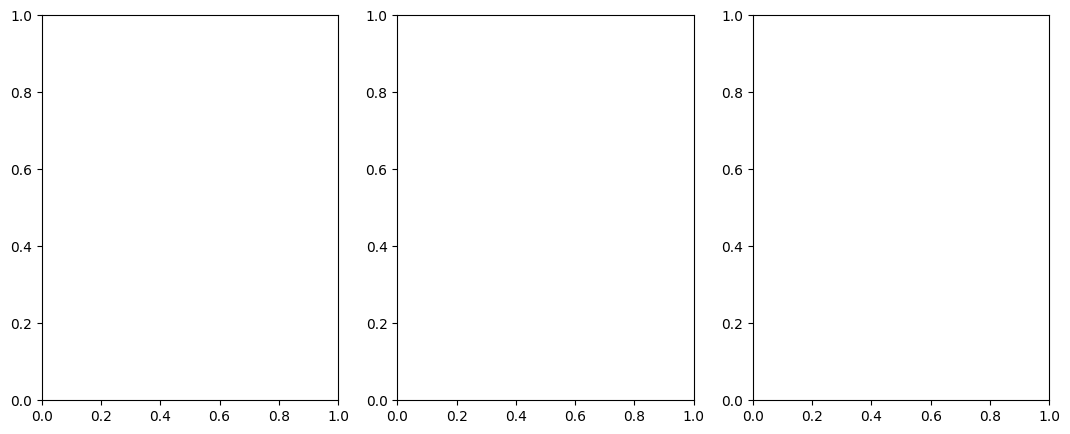

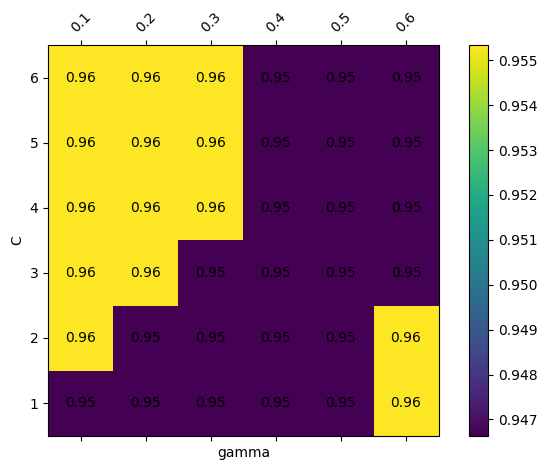

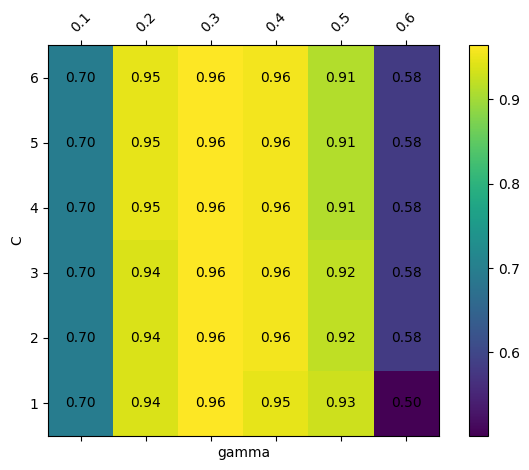

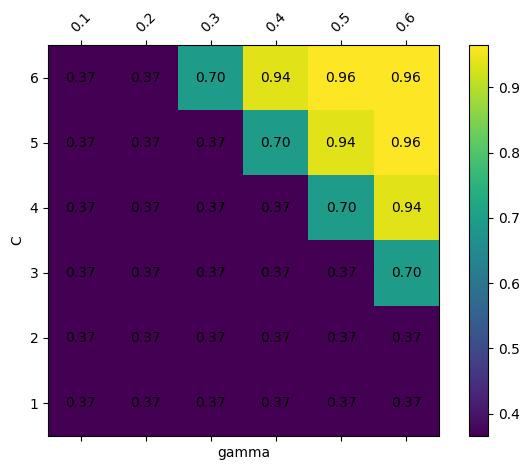

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}
tempCount=5

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 对交叉验证平均分数作图
    #（目前使用这个绘制会报错暂时不用先）
    # scores_image = mglearn.tools.heatmap(
    #    scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
    #    yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    drawHeatmap(scores)
    plt.tight_layout()
    plt.savefig('Images/02GridSearch-0'+str(tempCount)+'.png', bbox_inches='tight')
    plt.show()
    tempCount += 1

# plt.colorbar(scores_image, ax=axes.tolist())



In [51]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))


List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [52]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [53]:
results = pd.DataFrame(grid_search.cv_results_)
# 我们给出的是转置后的表格，这样更适合页面显示：
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000759,0.000998,0.000998,0.000798,0.000798,0.001196,0.000797,0.000796,0.000796,0.000999,...,0.000503,0.000398,0.000998,0.001194,0.000995,0.000796,0.000997,0.000798,0.000598,0.000598
std_fit_time,0.000387,0.000002,0.000002,0.000399,0.000399,0.000399,0.000399,0.000398,0.000398,0.000002,...,0.000446,0.000487,0.000002,0.000399,0.000002,0.000398,0.000003,0.000399,0.000488,0.000488
mean_score_time,0.000798,0.000198,0.000398,0.000599,0.000598,0.000399,0.000597,0.000602,0.000399,0.000597,...,0.0004,0.000598,0.000198,0.000799,0.000399,0.000597,0.000399,0.000398,0.000398,0.000398
std_score_time,0.000399,0.000397,0.000487,0.000489,0.000488,0.000489,0.000488,0.000492,0.000489,0.000487,...,0.00049,0.000488,0.000397,0.000399,0.000488,0.000488,0.000488,0.000487,0.000487,0.000488
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [54]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [57]:

def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 对于外层交叉验证的每次数据划分，split方法返回索引值
    for training_samples, test_samples in outer_cv.split(X, y):
        # 利用内层交叉验证找到最佳参数
        best_parms = {}
        best_score = -np.inf
        # 遍历参数
        for parameters in parameter_grid:
            # 在内层划分中累加分数
            cv_scores = []
            # 遍历内层交叉验证
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 对于给定的参数和训练数据来构建分类器
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 在内层测试集上进行评估
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 计算内层交叉验证的平均分数
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 如果比前面的模型都要好，则保存其参数
                best_score = mean_score
                best_params = parameters
        # 利用外层训练集和最佳参数来构建模型
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 评估模型
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [58]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
          StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))


Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [ ]:
#用热图分析交叉验证的结果
import pandas as pd
import mglearn
#转换为DataFrame
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6,6)
#对交叉验证平均分数作图
mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

In [ ]:
def test_visualization_cross_and_grid(iris):
    params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(SVC(), params, cv=5)
    xtr, xte, ytr, yte = train_test_split(iris.data, iris.target, random_state=0)
    grid_search.fit(xtr, ytr)
    scores = np.array(pd.DataFrame(grid_search.cv_results_).mean_test_score).reshape(6, 6)
    mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=params['gamma'], ylabel='C', yticklabels=params['C'], cmap='viridis')
    plot.show()

test_visualization_cross_and_grid(iris)

In [ ]:
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import load_iris

    #在两个参数上使用for循环

    #加载数据
    iris = load_iris()
    X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

    best_score = 0
    p={}

    C = [0.001,0.01,0.1,1,10,100]
    G = [0.001,0.01,0.1,1,10,100]

    for c in C:
        for g in G:
            svc = SVC(C=c,gamma=g)
            svc.fit(X_train,y_train)
            score = svc.score(X_test,y_test)
            
            if score > best_score:
                best_score = score
                p = {'C':c,'gamma':g}
            
    print("best score:{}".format(best_score))
    print('best parameters:{}'.format(p))





In [ ]:
mglearn.plots.plot_threefold_split()

In [ ]:
  #利用验证集选定最佳参数后，利用找到的参数构建一个模型
  #再次在训练集和验证集上训练（使得训练数据尽可能的多）

  #训练集+验证集 以及 测试集
  X_train_val,X_test,y_train_val,y_test = train_test_split(iris.data,iris.target,random_state=0)

  #将训练集+验证集分开
  X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,random_state=1)

  print("size of train_set:{}\n val_set:{} \n test_set:{}".format(X_train.shape,X_val.shape,X_test.shape))

In [ ]:
  best_score = 0
  p={}

  C = [0.001,0.01,0.1,1,10,100]
  G = [0.001,0.01,0.1,1,10,100]

  for c in C:
      for g in G:
          svc = SVC(C=c,gamma=g)
          svc.fit(X_train,y_train)
          score = svc.score(X_val,y_val)
          
          if score > best_score:
              best_score = score
              p = {'C':c,'gamma':g}
          
  print("best score:{}".format(best_score))
  print('best parameters:{}'.format(p))

  #用最优参数构建一个模型

  svc = SVC(**p)
  svc.fit(X_train_val,y_train_val)
  score = svc.score(X_test,y_test)
  print("Test set with best parameters:{}".format(score))

In [ ]:
  from sklearn.model_selection import cross_val_score

  #加载数据
  iris = load_iris()
  X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

  best_score = 0
  p={}

  C = [0.001,0.01,0.1,1,10,100]
  G = [0.001,0.01,0.1,1,10,100]

  for c in C:
      for g in G:
          svc = SVC(C=c,gamma=g)
          
          #交叉验证
          score = cross_val_score(svc,X_train,y_train,cv=5)
          score = score.mean()
          
          if score > best_score:
              best_score = score
              p = {'C':c,'gamma':g}
          
  print("best score:{}".format(best_score))
  print('best parameters:{}'.format(p))


  #用最优参数构建一个模型

  svc = SVC(**p)
  svc.fit(X_train,y_train)
  score = svc.score(X_test,y_test)
  print("Test set with best parameters:{}".format(score))


In [ ]:
 mglearn.plots.plot_grid_search_overview()

In [ ]:
#参数字典

param_grid = {"C":[0.001,0.01,0.1,1,10,100],
             "gamma":[0.001,0.01,0.1,1,10,100]}

#使用模型（svm）、参数网格（param_grid）、交叉验证策略（比如说5折），将GridSearchCV实例化

from sklearn.model_selection import GridSearchCV

#实例化
grid_search = GridSearchCV(SVC(),param_grid,cv=5)

#交叉验证可以代替划分训练集和验证集
#但我们需要将数据划分为训练集和验证集，避免参数过拟合
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

#创建的grid_search对象的行为就像是一个分类器，它具有fit，score，predict的方法，因此可以在训练集和测试集使用

grid_search.fit(X_train,y_train)
print("Teat score:{}".format(grid_search.score(X_test,y_test)))

In [ ]:
  #gird_search的最优参数保存在best_params_属性中
  #交叉验证的最佳精度保存在best_score_属性中

  print("Best parametes:{}".format(grid_search.best_params_))
  print("Best cross validation scire:{}".format(grid_search.best_score_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

In [ ]:
#用热图可视化cv_results,x轴为gamma，y轴为C，表格中的值代表精度


scores = np.array(results.mean_test_score).reshape(6,6)
print(scores)

fig, ax = plt.subplots()  
cax = ax.matshow(scores, cmap='viridis')  
fig.colorbar(cax)  
  
ticks = np.arange(0, len(param_grid['C']), 1)  
ax.set_xticks(ticks)  
ax.set_xticklabels(param_grid['gamma'])  
ax.xaxis.set_tick_params(rotation=45)  
  
ticks = np.arange(0, len(param_grid['gamma']), 1)  
ax.set_yticks(ticks)  
ax.set_yticklabels(param_grid['C'])  
  
ax.set_xlabel('gamma')  
ax.set_ylabel('C')  
  
plt.show()

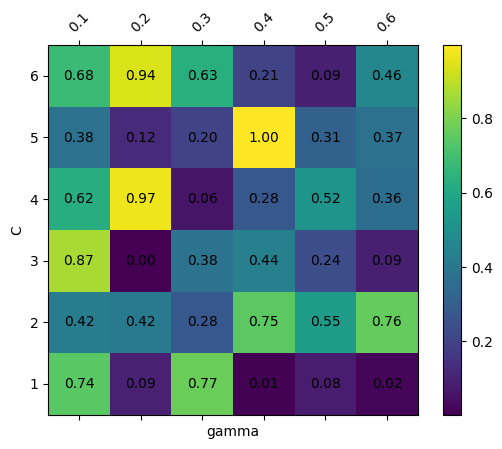

In [19]:
import numpy as np    
import matplotlib.pyplot as plt    
  
# 示例数据  
scores = np.random.rand(6, 6)  
  
# 反转scores数组的行顺序，以便(0, 0)在左下角  
scores = scores[::-1, :]  
  
# 绘制热图  
fig, ax = plt.subplots()  
cax = ax.matshow(scores, cmap='viridis')  
fig.colorbar(cax)  
  
# 假设param_grid['gamma']和param_grid['C']已经定义  
# 这里我们使用字符串列表作为示例  
param_grid = {  
    'gamma': ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6'],  
    'C': ['1', '2', '3', '4', '5', '6']  
}  
  
# 设置xticks和yticks的位置  
ticks_x = np.arange(len(param_grid['gamma']))  
ticks_y = np.arange(len(param_grid['C']))[::-1]  # 反转yticks的顺序以匹配反转的scores  
  
# 设置xticklabels和yticklabels  
ax.set_xticks(ticks_x)  
ax.set_xticklabels(param_grid['gamma'])  
ax.xaxis.set_tick_params(rotation=45)  
  
ax.set_yticks(ticks_y)  
ax.set_yticklabels(param_grid['C'])  
  
# 设置x轴和y轴的标签  
ax.set_xlabel('gamma')  
ax.set_ylabel('C')  
  
# 添加数值到每个单元格  
for (i, j), z in np.ndenumerate(scores):  
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')  
  
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 对交叉验证平均分数作图
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

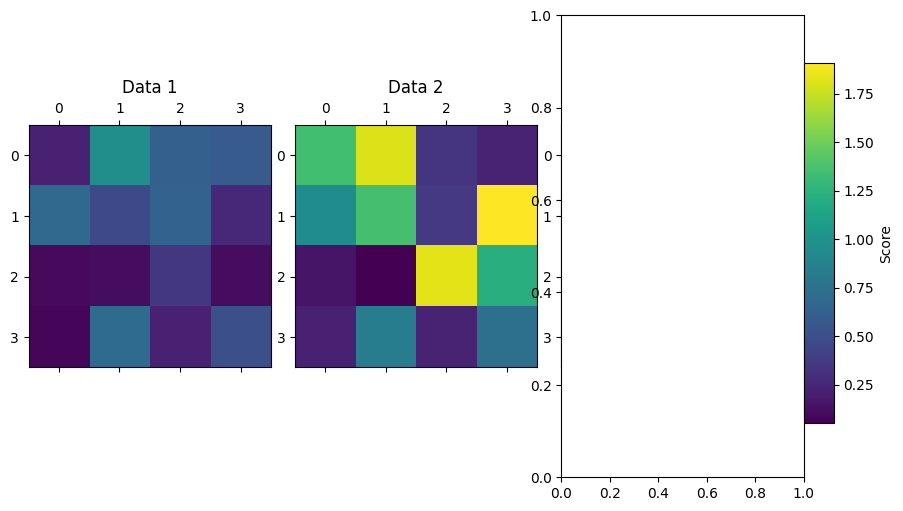

In [38]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# 假设有三组数据，它们的形状是相同的 (例如, (4, 4))  
data1 = np.random.rand(4, 4)  
data2 = np.random.rand(4, 4) * 2  # 假设第二组数据的值范围更大  
data3 = np.random.rand(4, 4) * 1.5  
  
# 找到所有数据的最大和最小值  
vmin = min(data1.min(), data2.min(), data3.min())  
vmax = max(data1.max(), data2.max(), data3.max())  
  
# 创建一个figure和gridspec  
fig = plt.figure(figsize=(10, 6))  
gs = plt.GridSpec(1, 3, wspace=0.1, hspace=0.1)  
  
# 绘制三组数据  
axes = []  
caxes = []  
for i, data in enumerate([data1, data2, data3]):  
    ax = fig.add_subplot(gs[i])  
    cax = ax.matshow(data, cmap='viridis', vmin=vmin, vmax=vmax)  
    axes.append(ax)  
    caxes.append(cax)  
  
# 创建一个独立的axes来放置colorbar  
fig.add_subplot(gs[:, -1])  # 使用GridSpec的最后一个位置  
plt.colorbar(cax, cax=fig.add_axes([0.9, 0.2, 0.03, 0.6]), label='Score')  # 这里的cax只是为了传递cmap，实际使用caxes中的任何一个都可以  
  
# 隐藏最后一个axes的x和y轴刻度  
#fig.axes[-1].set_xticks([])  
#fig.axes[-1].set_yticks([])  
  
# 设置子图的标题或标签（如果需要）  
for ax, label in zip(axes, ['Data 1', 'Data 2', 'Data 3']):  
    ax.set_title(label)  
  
plt.show()